In [17]:
source("https://bioconductor.org/biocLite.R")
biocLite("org.Hs.eg.db")

Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.2 (2016-10-31).
Installing package(s) ‘org.Hs.eg.db’
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'backports', 'broom', 'colorspace', 'data.table', 'DBI',
  'digest', 'forcats', 'ggplot2', 'jsonlite', 'Matrix', 'mgcv', 'nlme',
  'openssl', 'pbdZMQ', 'pbkrtest', 'psych', 'Rcpp', 'RcppEigen', 'rprojroot',
  'selectr', 'shiny', 'SparseM', 'stringr', 'tidyr', 'tidyverse', 'xml2', 'zoo'


In [1]:
#libraries
library(GO.db)
library(topGO)
library(org.Hs.eg.db)
library(org.Sc.sgd.db)
library(GOSemSim)

Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit, which, which.max, which.min

Loading required package: Biobase
Welcome to Bioconductor

 

In [2]:
db <- org.Sc.sgd.db
mapping <- "org.Sc.sgd.db"
ID <- "ENSEMBL"
# db <- org.Hs.eg.db
# mapping <- "org.Hs.eg.db"
# ID <- "ENTREZ"

In [154]:
#background gene list
setwd('/home/david/Documents/ghsom')
allGenes <- scan("Uetz_screen.txt", character())
# allGenes <- scan("Y2H_union.txt", character())
# allGenes <- scan("HI-II-14.txt", character())
allGenes <- unique(allGenes) 
length(allGenes)

[1] 806

In [116]:
allGenes <- select(org.Sc.sgd.db, keys=keys(org.Sc.sgd.db), columns="ORF")$ORF
length(allGenes)

[1] 8061

In [118]:
##load all community gene lists
setwd("/home/david/Documents/ghsom/uetz_communities_04")
# setwd("/home/david/Documents/ghsom/union_communities_08")
# setwd("/home/david/Documents/ghsom/hi_communities_08")

g <- list()
numCom <- 0
filename <- sprintf("community_%s.txt", numCom)
while (file.exists(filename)) {
    numCom <- numCom + 1
    g[[numCom]] <- scan(filename, character())
    filename <- sprintf("community_%s.txt", numCom)
}
numCom

[1] 8

In [119]:
#distances between neurons
shortest.path <- read.csv("shortest_path.csv", sep=",", header=FALSE)

In [120]:
#factor of interesting genes
geneList <- factor(as.integer(allGenes %in% g[[3]]))
names(geneList) <- allGenes

#construct topGO object
GOdata <- new("topGOdata", description=sprintf("topGO object for community 1"),
              ontology = "BP", allGenes = geneList,
              annotationFun = annFUN.org, mapping = mapping, 
              ID = ID, nodeSize = 10)

#fishers exact test classic
resultFisher <- runTest(GOdata, algorithm = "classic", statistic = "fisher")

gos <- score(resultFisher)[score(resultFisher) < 0.05]

#tabulate results
allRes <- GenTable(GOdata, classicFisher = resultFisher,
              orderBy = "classicFisher", topNodes = 500)


Building most specific GOs .....
	( 2901 GO terms found. )

Build GO DAG topology ..........
	( 5057 GO terms and 11391 relations. )

Annotating nodes ...............
	( 5883 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 666 nontrivial nodes
		 parameters: 
			 test statistic: fisher


In [122]:
gos

GO:0000003   GO:0001558   GO:0001731   GO:0006220   GO:0006221   GO:0006525 
0.0324138697 0.0028478420 0.0067620808 0.0123467343 0.0123467343 0.0111106867 
  GO:0006534   GO:0007009   GO:0007015   GO:0007049   GO:0007126   GO:0007127 
0.0067620808 0.0294931352 0.0256661403 0.0154135266 0.0190684235 0.0139049721 
  GO:0007154   GO:0007163   GO:0007165   GO:0007530   GO:0007531   GO:0007533 
0.0187911662 0.0194485289 0.0103565809 0.0294931352 0.0294931352 0.0193651658 
  GO:0009070   GO:0009112   GO:0009124   GO:0009129   GO:0009130   GO:0016049 
0.0259225233 0.0433928494 0.0187496614 0.0058295472 0.0058295472 0.0455807763 
  GO:0019344   GO:0022402   GO:0023052   GO:0030029   GO:0030036   GO:0030154 
0.0049612025 0.0327425192 0.0112570139 0.0229769088 0.0200113604 0.0409966140 
  GO:0030261   GO:0030950   GO:0030952   GO:0031929   GO:0034502   GO:0040008 
0.0136401040 0.0001434561 0.0001434561 0.0002794162 0.0412809166 0.0150336237 
  GO:0043094   GO:0043173   GO:0044699   GO:0044700   GO:0044702   GO:0044763 
0.0392095815 0.0067620808 0.0075117373 0.0103565809 0.0395692503 0.0152668486 
  GO:0045003   GO:0045132   GO:0045143   GO:0045165   GO:0045454   GO:0046434 
0.0077576210 0.0136766742 0.0031128240 0.0294931352 0.0351922409 0.0136401040 
  GO:0050789   GO:0050794   GO:0051017   GO:0061572   GO:0065007   GO:0071941 
0.0096293233 0.0064864117 0.0209290419 0.0209290419 0.0171219073 0.0049612025 
  GO:0072527   GO:0072528   GO:0072659   GO:0090002   GO:1903046   GO:1990778 
0.0079768478 0.0057814586 0.0149897031 0.0123467343 0.0404618971 0.0193651658

In [124]:
select(GO.db, keys=names(gos), columns=c("TERM", "DEFINITION"))

'select()' returned 1:1 mapping between keys and columns


GOID,TERM,DEFINITION
GO:0000003,reproduction,The production of new individuals that contain some portion of genetic material inherited from one or more parent organisms.
GO:0001558,regulation of cell growth,"Any process that modulates the frequency, rate, extent or direction of cell growth."
GO:0001731,formation of translation preinitiation complex,"The joining of the small ribosomal subunit, ternary complex, and mRNA."
GO:0006220,pyrimidine nucleotide metabolic process,"The chemical reactions and pathways involving a pyrimidine nucleotide, a compound consisting of nucleoside (a pyrimidine base linked to a deoxyribose or ribose sugar) esterified with a phosphate group at either the 3' or 5'-hydroxyl group of the sugar."
GO:0006221,pyrimidine nucleotide biosynthetic process,"The chemical reactions and pathways resulting in the formation of a pyrimidine nucleotide, a compound consisting of nucleoside (a pyrimidine base linked to a deoxyribose or ribose sugar) esterified with a phosphate group at either the 3' or 5'-hydroxyl group of the sugar."
GO:0006525,arginine metabolic process,"The chemical reactions and pathways involving arginine, 2-amino-5-(carbamimidamido)pentanoic acid."
GO:0006534,cysteine metabolic process,"The chemical reactions and pathways involving cysteine, 2-amino-3-mercaptopropanoic acid."
GO:0007009,plasma membrane organization,"A process that is carried out at the cellular level which results in the assembly, arrangement of constituent parts, or disassembly of the plasma membrane."
GO:0007015,actin filament organization,"A process that is carried out at the cellular level which results in the assembly, arrangement of constituent parts, or disassembly of cytoskeletal structures comprising actin filaments. Includes processes that control the spatial distribution of actin filaments, such as organizing filaments into meshworks, bundles, or other structures, as by cross-linking."
GO:0007049,cell cycle,"The progression of biochemical and morphological phases and events that occur in a cell during successive cell replication or nuclear replication events. Canonically, the cell cycle comprises the replication and segregation of genetic material followed by the division of the cell, but in endocycles or syncytial cells nuclear replication or nuclear division may not be followed by cell division."


In [ ]:
generateTopGOData <- function(g){
    
}

In [125]:
filename <- sprintf("Uetz-04.rda")

if (file.exists(filename)){
    
    print(sprintf("loading: %s", filename))
    load(filename)
    
} else {
    
    cutOff <- 0.05

    geneLists <- vector("list", numCom) 
    GOdataObjects <- vector("list", numCom) 
    resultFishers <- vector("list", numCom) 
    results <- vector("list", numCom) 
    gos <- vector("list", numCom) 

    #perform enrichment analyses
    for (c in 1:numCom){

        #factor of interesting genes
        geneList <- factor(as.integer(allGenes %in% g[[c]]))
        names(geneList) <- allGenes
        geneLists[[c]] <- geneList

        #construct topGO object
        GOdata <- new("topGOdata", description=sprintf("topGO object for community %s", c),
                      ontology = "BP", allGenes = geneList,
                      annotationFun = annFUN.org, mapping = mapping, 
                      ID = ID, nodeSize = 10)
        GOdataObjects[[c]] <- GOdata

        #fishers exact test classic
        resultFisher <- runTest(GOdata, algorithm = "classic", statistic = "fisher")
        resultFishers[[c]] <- resultFisher

        #tabulate results
        allRes <- GenTable(GOdata, classicFisher = resultFisher,
                      elimFisher = resultFisher.elim,
                      orderBy = "classicFisher", topNodes = 500)
        results[[c]] <- allRes

        #go terms < cut off 
        gos[[c]] <- score(resultFisher)[score(resultFisher) < cutOff]

        print(sprintf("community %s complete", c))
    }
    
    print(sprintf("Saving data: %s", filename))
    save(geneLists, GOdataObjects, resultFishers, results, gos, file=filename)
}


Building most specific GOs .....
	( 2901 GO terms found. )

Build GO DAG topology ..........
	( 5057 GO terms and 11391 relations. )

Annotating nodes ...............
	( 5883 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 587 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 1 complete"



Building most specific GOs .....
	( 2901 GO terms found. )

Build GO DAG topology ..........
	( 5057 GO terms and 11391 relations. )

Annotating nodes ...............
	( 5883 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 327 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 2 complete"



Building most specific GOs .....
	( 2901 GO terms found. )

Build GO DAG topology ..........
	( 5057 GO terms and 11391 relations. )

Annotating nodes ...............
	( 5883 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 666 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 3 complete"



Building most specific GOs .....
	( 2901 GO terms found. )

Build GO DAG topology ..........
	( 5057 GO terms and 11391 relations. )

Annotating nodes ...............
	( 5883 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 640 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 4 complete"



Building most specific GOs .....
	( 2901 GO terms found. )

Build GO DAG topology ..........
	( 5057 GO terms and 11391 relations. )

Annotating nodes ...............
	( 5883 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 512 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 5 complete"



Building most specific GOs .....
	( 2901 GO terms found. )

Build GO DAG topology ..........
	( 5057 GO terms and 11391 relations. )

Annotating nodes ...............
	( 5883 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 615 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 6 complete"



Building most specific GOs .....
	( 2901 GO terms found. )

Build GO DAG topology ..........
	( 5057 GO terms and 11391 relations. )

Annotating nodes ...............
	( 5883 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 311 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 7 complete"



Building most specific GOs .....
	( 2901 GO terms found. )

Build GO DAG topology ..........
	( 5057 GO terms and 11391 relations. )

Annotating nodes ...............
	( 5883 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 358 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 8 complete"
[1] "Saving data: Uetz-04.rda"


In [126]:
##SEMATIC SIMILARITY
#construct gosemsim object
semsimfile <- sprintf("Uetz-semsimfile.rda")
if (file.exists(semsimfile)){
    load(semsimfile)
} else {
    hsGO <- godata(mapping, ont="BP", keytype="ENSEMBL")
    save(hsGO, file=semsimfile)
    print(sprintf("saved semsimfile: %s", semsimfile))
}


In [127]:
information_content <- function(term){
    return (goSim(term, term, semData=hsGO, measure="Resnik"))
}

In [128]:
most_representative_term_ic <- function(namedTerms){
    ics <- sapply(names(namedTerms), information_content)
    names(ics) <- names(namedTerms)
    return(names(sort(ics, decreasing=TRUE)[1]))
}

In [133]:
most_representative_term_ancestor <- function(namedTerms){
    
    counts <- numeric(length(namedTerms))
    names(counts) <- names(terms)

    for (term in terms) {
        ancestors <- as.list(GOBPANCESTOR[names(term)])
        for (ancestor in ancestors[[names(term)]]) {
            if (ancestor %in% names(counts)) {
                counts[ancestor] <- counts[ancestor] + 1
            }
        }

    }
#     return (sort(names(counts), decreasing=TRUE)[1])
    return (sort(counts / sum(counts), decreasing=TRUE))
}

In [130]:
representativeTerms <- sapply(gos, most_representative_term_ic)

In [131]:
representativeTerms

[1] "GO:0051987" "GO:0006122" "GO:0071941" "GO:0042766" "GO:1900151"
[6] "GO:1900151" "GO:0000301" "GO:0007030"

In [132]:
select(GO.db, keys=representativeTerms, columns=c("TERM", "DEFINITION"))

'select()' returned many:1 mapping between keys and columns


GOID,TERM,DEFINITION
GO:0051987,positive regulation of attachment of spindle microtubules to kinetochore,"Any process that activates or increases the frequency, rate or extent of the attachment of spindle microtubules to the kinetochore."
GO:0006122,"mitochondrial electron transport, ubiquinol to cytochrome c","The transfer of electrons from ubiquinol to cytochrome c that occurs during oxidative phosphorylation, mediated by the multisubunit enzyme known as complex III."
GO:0071941,nitrogen cycle metabolic process,"A nitrogen compound metabolic process that contributes to the nitrogen cycle. The nitrogen cycle is a series of metabolic pathways by which nitrogen is converted between various forms and redox states; it encompasses pathways in which nitrogen is acted upon directly, such as nitrification, denitrification, nitrogen fixation, and mineralization."
GO:0042766,nucleosome mobilization,The movement of nucleosomes along a DNA fragment.
GO:1900151,"regulation of nuclear-transcribed mRNA catabolic process, deadenylation-dependent decay","Any process that modulates the frequency, rate or extent of nuclear-transcribed mRNA catabolic process, deadenylation-dependent decay."
GO:1900151,"regulation of nuclear-transcribed mRNA catabolic process, deadenylation-dependent decay","Any process that modulates the frequency, rate or extent of nuclear-transcribed mRNA catabolic process, deadenylation-dependent decay."
GO:0000301,"retrograde transport, vesicle recycling within Golgi","The retrograde movement of substances within the Golgi, mediated by COP I vesicles. Cis-Golgi vesicles are constantly moving forward through the Golgi stack by cisternal progression, eventually becoming trans-Golgi vesicles. They then selectively transport membrane and luminal proteins from the trans- to the medial-Golgi while leaving others behind in the trans-Golgi cisternae; similarly, they selectively move proteins from the medial- to the cis-Golgi."
GO:0007030,Golgi organization,"A process that is carried out at the cellular level which results in the assembly, arrangement of constituent parts, or disassembly of the Golgi apparatus."


In [138]:
shortest.path

V1,V2,V3,V4,V5,V6,V7,V8
0,1,4,2,3,1,2,1
1,0,3,1,2,1,2,2
4,3,0,2,1,3,2,3
2,1,2,0,1,1,1,2
3,2,1,1,0,2,1,2
1,1,3,1,2,0,2,2
2,2,2,1,1,2,0,1
1,2,3,2,2,2,1,0


In [142]:
representativeTerms[7]

[1] "GO:0000301"

In [143]:
representativeTerms[8]

[1] "GO:0007030"

In [141]:
goSim(representativeTerms[7], representativeTerms[8], semData=hsGO, measure="Wang")

[1] 0.056

In [103]:
sims <- mgoSim(representativeTerms, representativeTerms, semData=hsGO, measure="Resnik", combine=NULL)

In [109]:
sims <- mclusterSim(g, semData=hsGO, measure="Rel", combine="BMA")

In [110]:
head(sims)

0.997,0.579,0.691,0.720,0.631,0.707,0.618,0.616
0.579,0.997,0.511,0.584,0.613,0.555,0.560,0.575
0.691,0.511,0.997,0.684,0.661,0.713,0.614,0.600
0.720,0.584,0.684,0.995,0.670,0.697,0.613,0.576
0.631,0.613,0.661,0.670,0.991,0.661,0.630,0.657
0.707,0.555,0.713,0.697,0.661,0.997,0.621,0.605


In [111]:
head(shortest.path)

V1,V2,V3,V4,V5,V6,V7,V8
0,1,4,2,3,1,2,1
1,0,3,1,2,1,2,2
4,3,0,2,1,3,2,3
2,1,2,0,1,1,1,2
3,2,1,1,0,2,1,2
1,1,3,1,2,0,2,2


In [11]:
simfile <- sprintf("HI-II-14-sims.rda")
if (file.exists(simfile)){
    load(simfile)
} else {
    sims <- mclusterSim(g, semData=hsGO, measure="Wang", combine="BMA")
    save(sims, file=simfile)
    print (sprintf("saved sim file: %s", simfile))
}


[1] "saved sim file: HI-II-14-sims.rda"


In [45]:
weighted_similarity <- function(namedTerms1, namedTerms2) {
    

    s <- mgoSim(names(namedTerms1), 
           names(namedTerms2), semData=hsGO, measure="Wang", combine=NULL)

    t <- matrix(numeric(), 
                nrow=length(namedTerms1), 
                ncol=length(namedTerms2))
    
    for (t1 in 1:length(namedTerms1)){
        w1 <- namedTerms1[t1]
        term1 <- names(w1)
        for (t2 in 1:length(namedTerms2)){
            w2 <- namedTerms2[t2]
            term2 <- names(w2)
            t[[t1, t2]] <- s[term1, term2] * w1 * w2
        }
    }
         
    return(max(t))
    
}


In [49]:
t <- matrix(numeric(), nrow=numCom, ncol=numCom)
for (t1 in 1:numCom) {
    namedTerms1 <- normalisedRepresentativeTerms[[t1]]
    for (t2 in 1:numCom) {
        namedTerms2 <- normalisedRepresentativeTerms[[t2]]
        t[[t1, t2]] <- weighted_similarity(namedTerms1, namedTerms2)
    }
}
# rownames(t) <- representativeTerms
# colnames(t) <- representativeTerms
head(t)

0.034293553,0.004275132,0.001151369,0.001687243,0.002164470,0.011777778,0.001910569,0.001189084,0.0015594542,0.002238562,⋯,0.0054705525,0.013703704,0.002189542,0.032314815,0.012292824,0.001720325,0.003547325,0.009004630,0.019405163,0.018145087
0.004275132,0.081632653,0.014865424,0.005555556,0.004871671,0.009942857,0.002479443,0.018827068,0.0049122807,0.005252101,⋯,0.0029476971,0.045142857,0.006058824,0.011642857,0.017046429,0.005259970,0.008583333,0.017142857,0.026909091,0.025161747
0.001151369,0.014865424,0.005250998,0.001401610,0.001134856,0.003217391,0.001667020,0.004569031,0.0008593949,0.001393862,⋯,0.0006589055,0.006811594,0.001258312,0.003195652,0.003645652,0.001492805,0.001236715,0.002098430,0.005754941,0.005381243
0.001687243,0.005555556,0.001401610,0.003511660,0.002205650,0.002494815,0.001189810,0.001684211,0.0009315140,0.002043573,⋯,0.0009289617,0.021807407,0.001793464,0.006966667,0.005574074,0.001724382,0.002390123,0.002259259,0.008799102,0.008227732
0.002164470,0.004871671,0.001134856,0.002205650,0.004596380,0.002644068,0.001476313,0.001712756,0.0008777877,0.001471585,⋯,0.0008535704,0.020813559,0.003003739,0.006000000,0.008180932,0.002695095,0.006120527,0.004255297,0.012914227,0.012075641
0.011777778,0.009942857,0.003217391,0.002494815,0.002644068,0.040000000,0.004878049,0.004052632,0.0022526316,0.002929412,⋯,0.0073267760,0.015500000,0.006388235,0.020500000,0.018275000,0.003604240,0.004333333,0.009050000,0.028848485,0.026975207


In [13]:
semSimTable <- mgoSim(representativeTerms, representativeTerms, semData=hsGO, measure="Wang", combine=NULL)

In [14]:
t <- matrix(numeric(), nrow=numCom, ncol=numCom)
for (t1 in 1:numCom) {
    term1 <- representativeTerms[t1]
    for (t2 in 1:numCom) {
        term2 <- representativeTerms[t2]
        t[[t1, t2]] <- semSimTable[term1, term2]
    }
}
rownames(t) <- representativeTerms
colnames(t) <- representativeTerms
head(t)

,GO:0090304,GO:0090596,GO:0060993,GO:0010941,GO:0048523,GO:0009058,GO:0031570,GO:0035239,GO:0006839,GO:0007010,⋯,GO:1901575,GO:0017157,GO:0051648,GO:0000209,GO:0009987,GO:0023052,GO:0032879,GO:0016192,GO:0009987,GO:0009987
GO:0090304,1.000,0.054,0.052,0.122,0.151,0.210,0.117,0.061,0.048,0.137,⋯,0.280,0.074,0.067,0.349,0.247,0.114,0.078,0.067,0.247,0.247
GO:0090596,0.054,1.000,0.718,0.134,0.085,0.119,0.141,0.626,0.119,0.080,⋯,0.091,0.077,0.084,0.044,0.148,0.148,0.096,0.084,0.148,0.148
GO:0060993,0.052,0.718,1.000,0.128,0.081,0.111,0.134,0.599,0.114,0.076,⋯,0.086,0.075,0.079,0.042,0.138,0.138,0.091,0.079,0.138,0.138
GO:0010941,0.122,0.134,0.128,1.000,0.549,0.126,0.343,0.163,0.129,0.191,⋯,0.096,0.368,0.089,0.107,0.350,0.155,0.363,0.089,0.350,0.350
GO:0048523,0.151,0.085,0.081,0.549,1.000,0.161,0.210,0.094,0.077,0.246,⋯,0.122,0.307,0.116,0.141,0.449,0.200,0.426,0.116,0.449,0.449
GO:0009058,0.210,0.119,0.111,0.126,0.161,1.000,0.140,0.131,0.108,0.166,⋯,0.419,0.064,0.181,0.205,0.340,0.340,0.195,0.181,0.340,0.340


In [54]:
head(t * 100)

3.4293553,0.4275132,0.1151369,0.1687243,0.2164470,1.1777778,0.1910569,0.1189084,0.15594542,0.2238562,⋯,0.54705525,1.3703704,0.2189542,3.2314815,1.2292824,0.1720325,0.3547325,0.9004630,1.9405163,1.8145087
0.4275132,8.1632653,1.4865424,0.5555556,0.4871671,0.9942857,0.2479443,1.8827068,0.49122807,0.5252101,⋯,0.29476971,4.5142857,0.6058824,1.1642857,1.7046429,0.5259970,0.8583333,1.7142857,2.6909091,2.5161747
0.1151369,1.4865424,0.5250998,0.1401610,0.1134856,0.3217391,0.1667020,0.4569031,0.08593949,0.1393862,⋯,0.06589055,0.6811594,0.1258312,0.3195652,0.3645652,0.1492805,0.1236715,0.2098430,0.5754941,0.5381243
0.1687243,0.5555556,0.1401610,0.3511660,0.2205650,0.2494815,0.1189810,0.1684211,0.09315140,0.2043573,⋯,0.09289617,2.1807407,0.1793464,0.6966667,0.5574074,0.1724382,0.2390123,0.2259259,0.8799102,0.8227732
0.2164470,0.4871671,0.1134856,0.2205650,0.4596380,0.2644068,0.1476313,0.1712756,0.08777877,0.1471585,⋯,0.08535704,2.0813559,0.3003739,0.6000000,0.8180932,0.2695095,0.6120527,0.4255297,1.2914227,1.2075641
1.1777778,0.9942857,0.3217391,0.2494815,0.2644068,4.0000000,0.4878049,0.4052632,0.22526316,0.2929412,⋯,0.73267760,1.5500000,0.6388235,2.0500000,1.8275000,0.3604240,0.4333333,0.9050000,2.8848485,2.6975207


In [55]:
head(shortest.path)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27
0,1,2,2,2,3,3,3,2,1,⋯,4,3,5,2,1,2,4,3,2,1
1,0,1,1,1,2,3,2,2,1,⋯,3,4,4,3,2,3,5,4,3,2
2,1,0,1,2,3,4,3,3,2,⋯,4,5,5,4,3,4,6,5,4,3
2,1,1,0,1,2,3,2,3,2,⋯,3,4,4,4,3,4,5,5,4,3
2,1,2,1,0,1,2,1,2,1,⋯,2,3,3,3,3,3,4,5,4,3
3,2,3,2,1,0,1,2,3,2,⋯,1,2,2,3,4,3,3,4,5,4


In [50]:
distances <- numeric(length = (numCom * (numCom - 1)) / 2)
semSims <- numeric(length = (numCom * (numCom - 1)) / 2)

completed <- 0

for (c1 in 1:numCom) {
    
    t1 <- representativeTerms[c1]
#     gs1 <- g[[c1]]
#     if (length(gos[[c1]]) == 0) next
    
    for (c2 in c1:numCom) {
        
        if (c1 == c2) next
            
            t2 <- representativeTerms[c2]
            
#         if (length(gos[[c2]]) == 0) next
            
#         gs2 <- g[[c2]]    
        
        completed <- completed + 1  
        
        #compute semantic similarity of two protein clusters
#         semSims[completed] <- clusterSim(gs1, gs2, semData=scGO, measure="Wang", combine="BMA")
#         semSims[completed] <- mgoSim(gos[[c1]], gos[[c2]], semData=scGO, measure="Wang", combine="BMA")
#         semSims[completed] <- semSimTable[t1, t2]
        semSims[completed] <- t[c1, c2]
            
        distances[completed] <- shortest.path[c1, c2]
        
        print(sprintf("Completed: %s", completed))
    }
}
# distances <- distances[distances > 0]
# semSims <- semSims[semSims > 0]

[1] "Completed: 1"
[1] "Completed: 2"
[1] "Completed: 3"
[1] "Completed: 4"
[1] "Completed: 5"
[1] "Completed: 6"
[1] "Completed: 7"
[1] "Completed: 8"
[1] "Completed: 9"
[1] "Completed: 10"
[1] "Completed: 11"
[1] "Completed: 12"
[1] "Completed: 13"
[1] "Completed: 14"
[1] "Completed: 15"
[1] "Completed: 16"
[1] "Completed: 17"
[1] "Completed: 18"
[1] "Completed: 19"
[1] "Completed: 20"
[1] "Completed: 21"
[1] "Completed: 22"
[1] "Completed: 23"
[1] "Completed: 24"
[1] "Completed: 25"
[1] "Completed: 26"
[1] "Completed: 27"
[1] "Completed: 28"
[1] "Completed: 29"
[1] "Completed: 30"
[1] "Completed: 31"
[1] "Completed: 32"
[1] "Completed: 33"
[1] "Completed: 34"
[1] "Completed: 35"
[1] "Completed: 36"
[1] "Completed: 37"
[1] "Completed: 38"
[1] "Completed: 39"
[1] "Completed: 40"
[1] "Completed: 41"
[1] "Completed: 42"
[1] "Completed: 43"
[1] "Completed: 44"
[1] "Completed: 45"
[1] "Completed: 46"
[1] "Completed: 47"
[1] "Completed: 48"
[1] "Completed: 49"
[1] "Completed: 50"
[1] "Comp

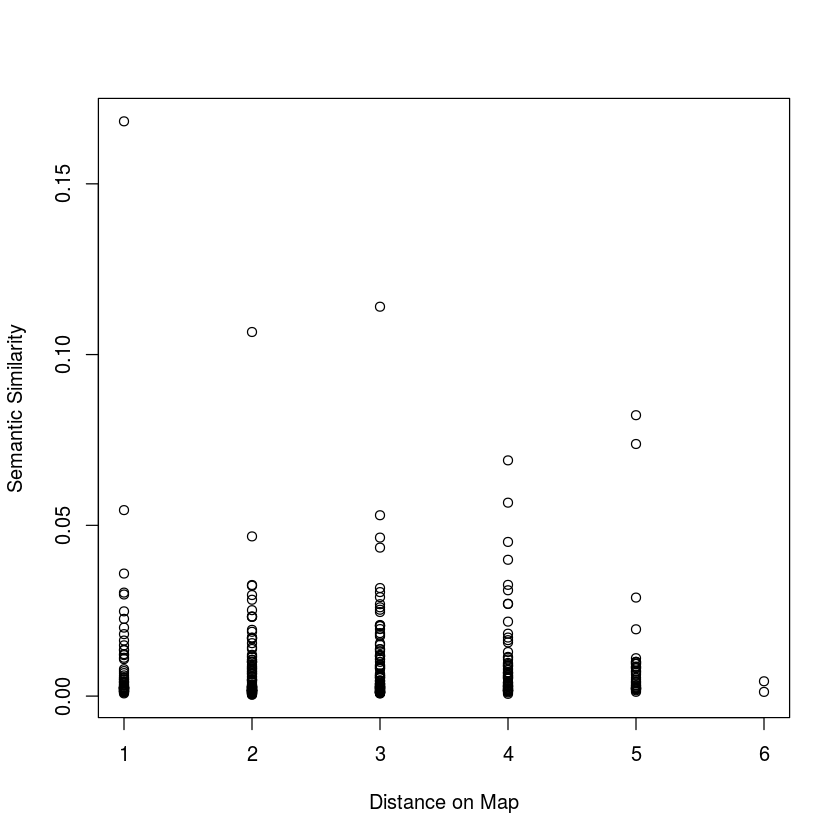

In [51]:
plot(distances, semSims, xlab="Distance on Map", ylab="Semantic Similarity")

In [52]:
cor(distances, semSims)

[1] 0.01196482

In [145]:
source("https://bioconductor.org/biocLite.R")
biocLite("GOSim")

Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.2 (2016-10-31).
Installing package(s) ‘GOSim’
also installing the dependencies ‘modeltools’, ‘flexmix’, ‘corpcor’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'AnnotationHub', 'backports', 'broom', 'cluster', 'colorspace',
  'data.table', 'DBI', 'digest', 'forcats', 'ggplot2', 'IRanges', 'jsonlite',
  'Matrix', 'mgcv', 'nlme', 'openssl', 'pbdZMQ', 'pbkrtest', 'psych', 'Rcpp',
  'RcppEigen', 'rprojroot', 'S4Vectors', 'selectr', 'shiny', 'SparseM',
  'stringi', 'stringr', 'survival', 'tidyr', 'tidyverse', 'xml2', 'XVector',
  'zoo'


In [148]:
sim

,225,84836,23416,9530,23475,151887,3685,115817,4071,55884,3656,7818,5395,23175,2104,54413,762,6489
225,1.0000000,0.5903353,0.53151532,0.4653260,0.4210968,0.125476305,0.5986836,0.80619542,0,0.41949424,0.41896341,0.32565951,0.34314195,0.5658617,0.42940116,0.2392648,0.612230961,0.44176570
84836,0.5903353,1.0000000,0.50193594,0.5542649,0.8821653,0.168950083,0.6140322,0.15390856,0,0.73417429,0.95934580,0.49527069,0.79878584,0.9847313,0.98477693,0.1764879,0.243230407,0.74546356
23416,0.5315153,0.5019359,1.00000000,0.3818560,0.3279403,0.063199292,0.6832786,0.10517188,0,0.51830044,0.41118750,0.33895409,0.27348944,0.3843691,0.39684550,0.5426555,0.330003369,0.37743569
9530,0.4653260,0.5542649,0.38185605,1.0000000,0.5633817,0.638561249,0.4549908,0.11754220,0,0.63583351,0.52406009,0.49407059,0.35927277,0.4779349,0.48487792,0.4601568,0.194021782,0.59195495
23475,0.4210968,0.8821653,0.32794033,0.5633817,1.0000000,0.198606982,0.4813984,0.11744179,0,0.44987961,0.54678789,0.44355164,0.46761418,0.7618055,0.66369390,0.1649841,0.251394271,0.45348205
151887,0.1254763,0.1689501,0.06319929,0.6385612,0.1986070,1.000000000,0.9683928,0.00000000,0,0.08098105,0.16281032,0.21012891,0.01049687,0.1727947,0.15531048,0.4430297,0.009840707,0.17151636
3685,0.5986836,0.6140322,0.68327861,0.4549908,0.4813984,0.968392799,1.0000000,0.13186042,0,0.70648232,0.57885633,0.57671024,0.47036137,0.5224944,0.50122005,0.4542057,0.342273880,0.63104722
115817,0.8061954,0.1539086,0.10517188,0.1175422,0.1174418,0.000000000,0.1318604,1.00000000,0,0.16148600,0.16658847,0.09164676,0.12552845,0.2033030,0.16495558,0.0000000,0.116848487,0.16455062
4071,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.000000000,0.0000000,0.00000000,1,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.0000000,0.000000000,0.00000000
55884,0.4194942,0.7341743,0.51830044,0.6358335,0.4498796,0.080981048,0.7064823,0.16148600,0,1.00000000,0.81711516,0.46994807,0.49561301,0.7519359,0.61552308,0.2060095,0.088874854,0.60144863


Loading required package: annotate
Loading required package: XML

Attaching package: ‘XML’

The following object is masked from ‘package:graph’:

    addNode


Attaching package: ‘annotate’

The following object is masked from ‘package:Rgraphviz’:

    toFile

initializing GOSim package ...
-> retrieving GO information for all available genes for organism 'human' in GO database
-> filtering GO terms according to evidence levels 'all'
-> loading files with information content for corresponding GO category (human)
finished.
-> loading files with information content for corresponding GO category (human)


filtering out genes not mapping to the currently set GO category ... ===> list of  20 genes reduced to  18 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"
Loading required package: cluster


  median within cluster similarity similarity mad
1                        0.3645397      0.5404666
2                        0.6084859      0.2042396
3                        0.6129671      0.3894517


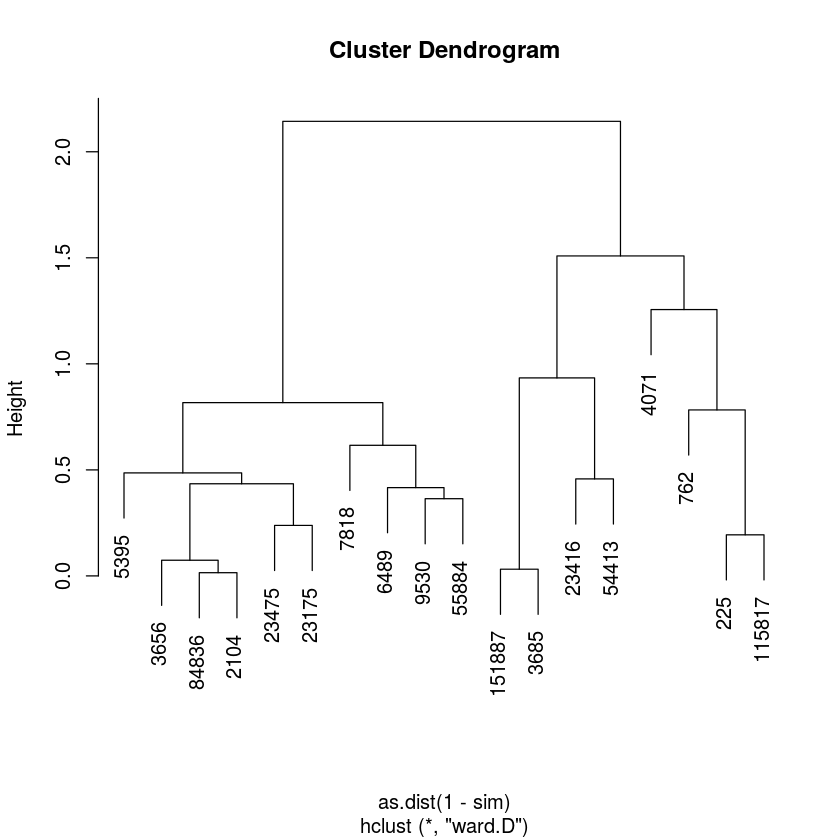


Building most specific GOs .....
	( 3094 GO terms found. )

Build GO DAG topology ..........
	( 6602 GO terms and 15032 relations. )

Annotating nodes ...............
	( 893 genes annotated to the GO terms. )

			 -- Elim Algorithm -- 

		 the algorithm is scoring 156 nontrivial nodes
		 parameters: 
			 test statistic: fisher
			 cutOff: 0.01

	 Level 13:	2 nodes to be scored	(0 eliminated genes)

	 Level 12:	5 nodes to be scored	(1 eliminated genes)

	 Level 11:	9 nodes to be scored	(1 eliminated genes)

	 Level 10:	8 nodes to be scored	(2 eliminated genes)

	 Level 9:	6 nodes to be scored	(2 eliminated genes)

	 Level 8:	8 nodes to be scored	(2 eliminated genes)

	 Level 7:	15 nodes to be scored	(2 eliminated genes)

	 Level 6:	26 nodes to be scored	(23 eliminated genes)

	 Level 5:	31 nodes to be scored	(23 eliminated genes)

	 Level 4:	22 nodes to be scored	(23 eliminated genes)

	 Level 3:	16 nodes to be scored	(23 eliminated genes)

	 Level 2:	7 nodes to be scored	(23 eliminate

,go_id,Term,Definition
15362,GO:0006352,"DNA-templated transcription, initiation","Any process involved in the assembly of the RNA polymerase preinitiation complex (PIC) at the core promoter region of a DNA template, resulting in the subsequent synthesis of RNA from that promoter. The initiation phase includes PIC assembly and the formation of the first few bonds in the RNA chain, including abortive initiation, which occurs when the first few nucleotides are repeatedly synthesized and then released. The initiation phase ends just before and does not include promoter clearance, or release, which is the transition between the initiation and elongation phases of transcription."
15393,GO:0006367,transcription initiation from RNA polymerase II promoter,"Any process involved in the assembly of the RNA polymerase II preinitiation complex (PIC) at an RNA polymerase II promoter region of a DNA template, resulting in the subsequent synthesis of RNA from that promoter. The initiation phase includes PIC assembly and the formation of the first few bonds in the RNA chain, including abortive initiation, which occurs when the first few nucleotides are repeatedly synthesized and then released. Promoter clearance, or release, is the transition between the initiation and elongation phases of transcription."
16251,GO:0006730,one-carbon metabolic process,The chemical reactions and pathways involving the transfer of one-carbon units in various oxidation states.
26338,GO:0015701,bicarbonate transport,"The directed movement of bicarbonate into, out of or within a cell, or between cells, by means of some agent such as a transporter or pore."
26349,GO:0015711,organic anion transport,"The directed movement of organic anions into, out of or within a cell, or between cells, by means of some agent such as a transporter or pore. Organic anions are atoms or small molecules with a negative charge which contain carbon in covalent linkage."
26563,GO:0015908,fatty acid transport,"The directed movement of fatty acids into, out of or within a cell, or between cells, by means of some agent such as a transporter or pore. Fatty acids are aliphatic monocarboxylic acids liberated from naturally occurring fats and oils by hydrolysis."
26564,GO:0015909,long-chain fatty acid transport,"The directed movement of long-chain fatty acids into, out of or within a cell, or between cells, by means of some agent such as a transporter or pore. A long-chain fatty acid is a fatty acid with a chain length between C13 and C22."
37800,GO:0032000,positive regulation of fatty acid beta-oxidation,"Any process that activates or increases the frequency, rate or extent of fatty acid beta-oxidation."
50291,GO:0042760,very long-chain fatty acid catabolic process,The chemical reactions and pathways resulting in the breakdown of a fatty acid which has a chain length greater than C22.
51729,GO:0043401,steroid hormone mediated signaling pathway,A series of molecular signals mediated by a steroid hormone binding to a receptor.


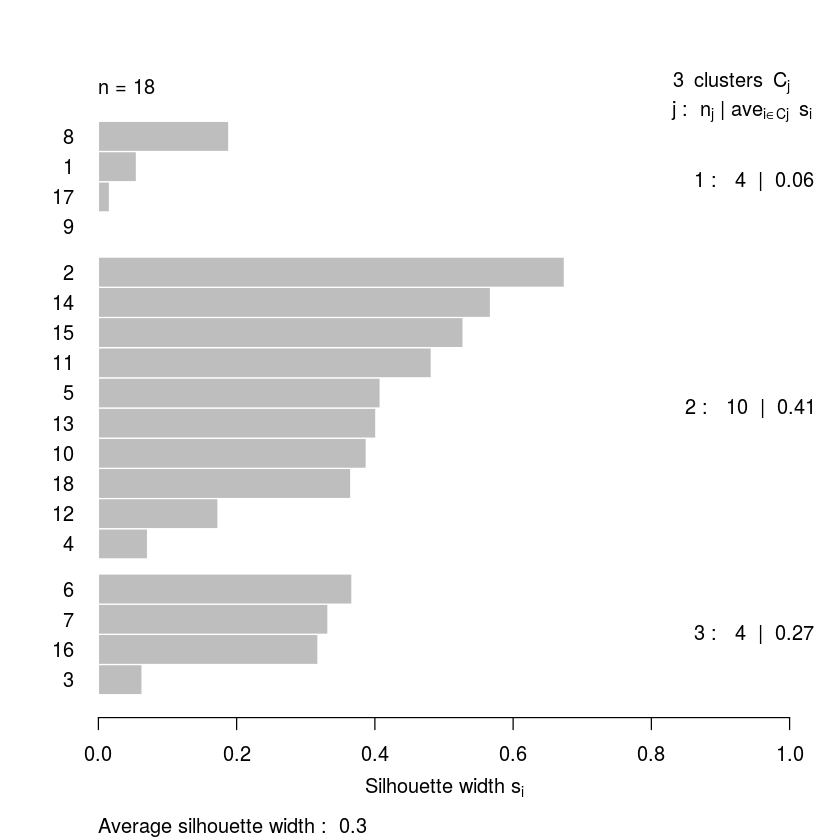

In [147]:
library(GOSim)
setOntology("BP")
gomap <- get("gomap",env=GOSimEnv)
allgenes = sample(names(gomap), 1000) # suppose these are all genes
genesOfInterest = sample(allgenes, 20) # suppose these are all genes of interest
sim = getGeneSim(genesOfInterest,verbose=FALSE) # and these are their similarities
hc = hclust(as.dist(1-sim), method="ward") # use them to perform a clustering
plot(hc) # plot the cluster tree
cl = cutree(hc, k=3) # take 3 clusters
if(require(cluster)){
    ev = evaluateClustering(cl, sim) # evaluate the clustering
    print(ev$clusterstats) # print out some statistics
    plot(ev$clustersil,main="") # plot the cluster silhouettes
}
# investigate cluster 1 further
if(require(topGO))
    GOenrichment(genesOfInterest[cl == 1], allgenes, cutoff=0.05) # print out what cluster 1 is about

In [149]:
sim = getGeneSim(g[[1]], g[[2]], verbose=FALSE)

filtering out genes not mapping to the currently set GO category ... ===> list of  27 genes reduced to  0 


ERROR: Error in getGeneSim(g[[1]], g[[2]], verbose = FALSE): No gene has GO information!


In [157]:
GOenrichment(g[[1]], allGenes, cutoff=0.05) # print out what cluster 1 is about

ERROR: Error in GOenrichment(g[[1]], allGenes, cutoff = 0.05): No GO information available for these genes!
